##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [859]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

Regresja liniowa dla danych z pliku SCORES.csv

In [860]:
#SCORES
df = pd.read_csv('SCORES.csv', header=0, delimiter= "," )
print(df.head(7))
# df.describe()
print(f'shape:{df.shape}')

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
shape:(25, 2)


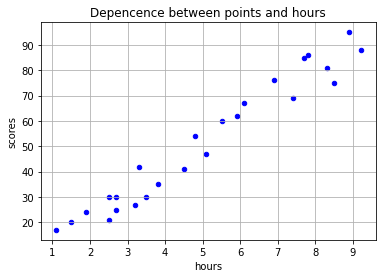

Corelation           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000 

Wskaźniki:
a: 9.995715799679813,
b: 0.9041015580960163


In [861]:
df.plot.scatter('Hours','Scores',marker='o',color='blue')
plt.title('Depencence between points and hours')
plt.xlabel('hours')
plt.ylabel('scores')
plt.grid()
plt.show()

print(f'Corelation{df.corr()} \n')

X=df.Hours #predykcja
y=df.Scores #wynik
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
reg=LinearRegression().fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
print(f'Wskaźniki:\na: {reg.coef_[0][0]},\nb: {reg.intercept_[0]}')

0.9506000223306498


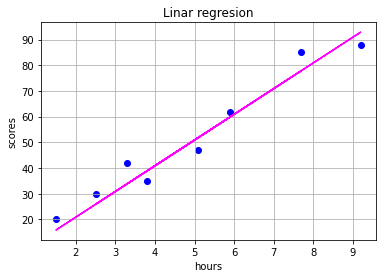

Mean Absolute Error: 4.900474080588061
Mean Squared Error: 27.175390840700196
Root Mean Squared Error: 5.21300209482983


In [862]:
y_pred=reg.predict(x_test.values.reshape(-1,1))
#print(y_pred,'\n\n',y_test.values.reshape(-1,1))
print(reg.score(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1)))

plt.scatter(x_test,y_test,marker='o',color='blue')
plt.plot(x_test,y_pred,color='magenta')
plt.title('Linar regresion')
plt.xlabel('hours')
plt.ylabel('scores')
plt.grid()
plt.show()

print(f'Mean Absolute Error: {sk.metrics.mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error: {sk.metrics.mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(sk.metrics.mean_squared_error(y_test,y_pred))}')

Patrząc na skorelowanie zmiennych można wywnioskować,że jakość uzyskana funkcja liniowa będzie dobrze odzwierciedlać zachowanie danych, co potwierdza wynik uzyskany za pomocą fnkcji score(), a także niezbyt duże wartości błędów.
Za pomocą funkcji coef() uzyskujemy współczynnik a (y=ax+b), czyli nachylenie prostej, a za pomocą intercept() można uzyskać wyraz wolny b.

Regresja liniowa dla danych z pliku SBP.csv

In [863]:
#SBP
df = pd.read_csv('SBP.csv', header=0, delimiter= "," )
print(df.head(5))
# df.describe()
print(df.shape)

   Age  SBP
0   60  117
1   61  120
2   74  145
3   57  129
4   63  132
(19, 2)


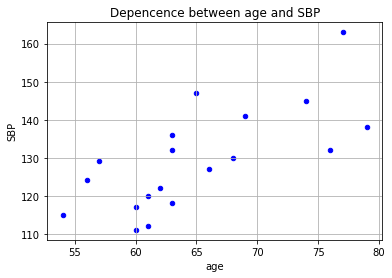

Corelation          Age       SBP
Age  1.000000  0.707605
SBP  0.707605  1.000000 

Wskaźniki:
a: 1.5286046020688198,
b: 28.053831538948714


In [864]:
df.plot.scatter('Age','SBP',marker='o',color='blue')
plt.title('Depencence between age and SBP')
plt.xlabel('age')
plt.ylabel('SBP')
plt.grid()
plt.show()

print(f'Corelation{df.corr()} \n')

X=df.Age #predykcja
y=df.SBP #wynik
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
reg=LinearRegression().fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
print(f'Wskaźniki:\na: {reg.coef_[0][0]},\nb: {reg.intercept_[0]}')


-0.436126822839058


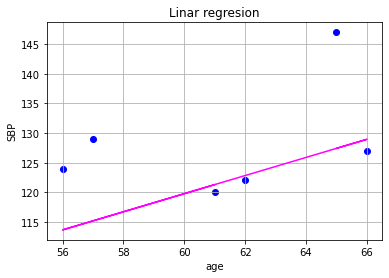

Mean Absolute Error: 7.969108437126171
Mean Squared Error: 114.61089894490594
Root Mean Squared Error: 10.705647992760921


In [865]:
y_pred=reg.predict(x_test.values.reshape(-1,1))
#print(y_pred,'\n\n',y_test.values.reshape(-1,1))
print(reg.score(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1)))

plt.scatter(x_test,y_test,marker='o',color='blue')
plt.plot(x_test,y_pred,color='magenta')
plt.title('Linar regresion')
plt.xlabel('age')
plt.ylabel('SBP')
plt.grid()
plt.show()

print("Mean Absolute Error:",sk.metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",sk.metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(sk.metrics.mean_squared_error(y_test,y_pred)))

W tym przypadku dane są bardziej rozproszone, ich skorelowanie jest znacznie mniejsze, co odzwierciedla bardzo niezadowalający (bardzo mała wartość score) wynik obarczony sporymi błędami .

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [866]:
df = pd.read_csv('PETROL.csv', header=0, delimiter= "," )
# df.describe()
print(df.shape)
df.head(15)

(48, 5)


,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


In [867]:
y=df.Zuzycie_paliwa
X=df[['Sredni_przychod','Utwardzone_autostrady','Procent_ludnosci_z_prawem_jazdy','Podatek_paliwowy']] 
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
reg=LinearRegression().fit(x_train,y_train)
print(f'Wskaźniki:\na: {reg.coef_},\nb: {reg.intercept_}')
pd.DataFrame(data=reg.coef_,index=X.columns,columns=['value of coefficient'])

Wskaźniki:
a: [-4.61401876e-02 -2.72795210e-03  1.35924752e+03 -3.28756913e+01],
b: 265.14308856258674


,value of coefficient
Sredni_przychod,-0.046140
Utwardzone_autostrady,-0.002728
Procent_ludnosci_z_prawem_jazdy,1359.247520
Podatek_paliwowy,-32.875691


In [868]:
y_pred=reg.predict(x_test)
#print(y_pred,'\n\n',y_test.values.reshape(-1,1))
print(reg.score(x_test,y_test))
print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}))
print("Mean Absolute Error:",sk.metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",sk.metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(sk.metrics.mean_squared_error(y_test,y_pred)))

0.5042983554565839
    actual   predicted
4      410  537.421776
0      541  512.709771
2      561  574.967071
5      457  462.399267
33     628  595.949297
47     524  583.536247
45     510  528.115134
37     704  634.306011
3      414  506.501213
23     547  462.744732
41     699  620.710188
8      464  492.596437
17     714  584.568119
19     640  689.220737
13     508  563.741454
Mean Absolute Error: 58.167414484820625
Mean Squared Error: 4793.531839945321
Root Mean Squared Error: 69.23533664210294


Spora wartość  RMSE wskazuje na to,że ten model może niezbyt dobrze przewidywać dane (uzyskany wynik score wynosi mniej niż 60%). Patrząc na wskaźniki można wywnioskować,że największy wpływ na predykcję ma:
- procent ludności z prawem jazdy
- podatek paliowowy,



ponieważ są to odpowiednio największa i najmniejsza z wartości uzyskanych współczynników.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [869]:
df=pd.read_csv('HEART.csv', header=0, delimiter= "," )
print(df.shape)
#df.describe
df.head(8)

(294, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0


In [870]:
#data clearing
columns=np.array(df.columns)
for column in columns:
    df.loc[df[column]=='?',column] = 'NaN' #zmiana wartości '?' na "NaN" w tabeli
NaN_lst=[]
for column in columns:
    NaN_lst.append((df[column]=='NaN').sum()) #zliczenie ilości NaN w każdej kolumnie,wykonane w celu określenia kolumn do usunięcia
print(NaN_lst)
df.drop(df.columns[[10,11,12]], axis=1, inplace=True) #usunięcie 3 kolumn z największą ilością brakujących danych
columns=np.array(df.columns) #nowa (pomniejszona) lista kolumn 
for column in columns:
     df.drop(df[df[column]=='NaN'].index, inplace=True) #usunięcie wierszy z brakującymi danymi
df.head(15) #wyświetlenie wyniku obróbki danych
print(df.columns)

[0, 0, 0, 1, 23, 8, 1, 1, 1, 0, 190, 291, 266, 0]
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num       '],
      dtype='object')


In [871]:
#zakodowanie niezależnych zmiennych kategorialnych
new_df=pd.DataFrame(pd.get_dummies(df[['cp','restecg']]))
new_df.head(10)

c:\Users\micha\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0
5,0,1,0,0,1,0,0
6,0,1,0,0,1,0,0
7,0,1,0,0,1,0,0
8,0,0,1,0,1,0,0
9,0,1,0,0,1,0,0
10,0,1,0,0,0,1,0


In [872]:
#podział danych i regresja logistyczna

y=df['num       ']
y=y.astype('int')
X=df[['age','sex','trestbps','chol', 'fbs','thalach','exang','oldpeak']]
n_X=X.join(new_df)
x_train, x_test,y_train,y_test = train_test_split(n_X,y,test_size=0.2)
lreg= LogisticRegression(C=1.0).fit(x_train,y_train)
y_pred=lreg.predict(x_test)
score = lreg.score(x_test, y_test)
print(score)

0.8301886792452831


c:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 103.73999999999997, 'predicted')

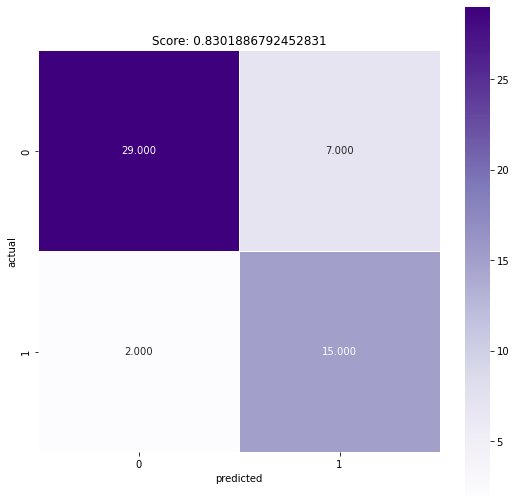

In [873]:
#ocena jakości uzyskanych wyników
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
cmatrix = metrics.confusion_matrix(y_test, y_pred) #wyznaczenie  i wizualizacja macierzy konfuzji do oceny dokładności
plt.figure(figsize=(9,9))
sns.heatmap(cmatrix,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Purples')
plt.title( 'Score: {0}'.format(score))
plt.ylabel('actual')
plt.xlabel('predicted')

In [874]:
print(classification_report(y_test, y_pred)) #wygenerowanie raportu, który ocenia model pod względem różnych metryk

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        36
           1       0.68      0.88      0.77        17

    accuracy                           0.83        53
   macro avg       0.81      0.84      0.82        53
weighted avg       0.85      0.83      0.83        53

